ニューラルネットワークの線形層および活性化関数を用いて、説明変数13項目から、住宅価格を予測する学習器を作成

In [ ]:
!pip install japanize_matplotlib | tail -n 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# データセット
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", 
    skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :], 
    raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

# 結果確認
print('元データ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

元データ (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
x.shape

(506, 13)

In [ ]:
x = x_org

In [ ]:
# 変数定義

# 入力次元数=13
n_input = x.shape[1]

# 出力次元数=1
n_output = 1

print(f"入力次元数:{n_input} 出力次元数:{n_output}")

入力次元数:13 出力次元数:1


In [ ]:
# モデルのクラス定義

class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()

    # 出力層の定義
    # 入力13次元、出力1次元
    self.l1 = nn.Linear(n_input, n_output)

    # 初期値の定義
    nn.init.constant_(self.l1.weight, 1.0)
    nn.init.constant_(self.l1.bias, 1.0)

  # 予測関数の定義
  def forward(self, x):
    x1 = self.l1(x)
    return x1

In [ ]:
# 勾配降下法

inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

In [ ]:
# 損失計算用に１列にする
label1 = labels.view((-1, 1))

In [ ]:
# 繰り返し処理のための初期化処理

# 学習率
lr = 0.000001

# インスタンス生成
net = Net(n_input, n_output)

# 損失関数：平均二乗誤差
criterion = nn.MSELoss()

# 最適化関数:勾配降下法
optimizer = optim.SGD(net.parameters(), lr = lr)

# 繰り返し回数
num_epoch = 5000

# 評価記録用
history = np.zeros((0,2))

In [ ]:
# 繰り返し処理
for epoch in range(num_epoch):

  # 勾配値初期化
  optimizer.zero_grad()

  # 予測計算
  outputs = net(inputs)

  # 誤差計算
  loss = criterion(outputs, label1)

  # 勾配計算
  loss.backward()

  # パラメータ修正
  optimizer.step()

  # 記録
  if(epoch % 100 == 0):
    history = np.vstack((history, np.array([epoch, loss.item()])))
    print(f"Epoch:{epoch} loss:{loss.item(): 5f}")

Epoch:0 loss: 823748.125000
Epoch:100 loss: 700.565430
Epoch:200 loss: 634.182373
Epoch:300 loss: 577.476440
Epoch:400 loss: 528.721436
Epoch:500 loss: 486.561218
Epoch:600 loss: 449.917725
Epoch:700 loss: 417.923584
Epoch:800 loss: 389.874603
Epoch:900 loss: 365.193634
Epoch:1000 loss: 343.403168
Epoch:1100 loss: 324.104706
Epoch:1200 loss: 306.963440
Epoch:1300 loss: 291.695801
Epoch:1400 loss: 278.060608
Epoch:1500 loss: 265.851105
Epoch:1600 loss: 254.889603
Epoch:1700 loss: 245.022888
Epoch:1800 loss: 236.117813
Epoch:1900 loss: 228.059158
Epoch:2000 loss: 220.746231
Epoch:2100 loss: 214.091446
Epoch:2200 loss: 208.018036
Epoch:2300 loss: 202.458832
Epoch:2400 loss: 197.355026
Epoch:2500 loss: 192.654938
Epoch:2600 loss: 188.313370
Epoch:2700 loss: 184.290344
Epoch:2800 loss: 180.550812
Epoch:2900 loss: 177.063873
Epoch:3000 loss: 173.802475
Epoch:3100 loss: 170.742645
Epoch:3200 loss: 167.863281
Epoch:3300 loss: 165.145752
Epoch:3400 loss: 162.573639
Epoch:3500 loss: 160.132477
E

In [ ]:
print(f"損失初期値: {history[0, 1]:.5f}")
print(f"損失最終値: {history[-1,1]:.5f}")

損失初期値: 823748.12500
損失最終値: 134.61205


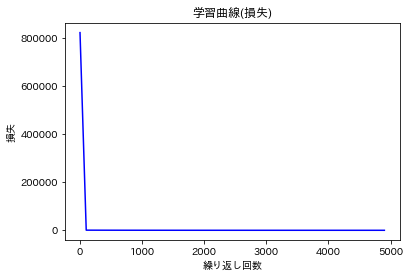

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

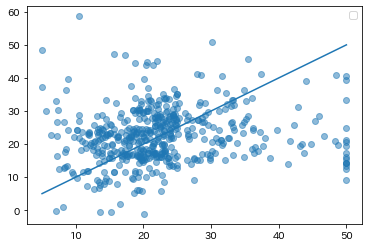

In [ ]:
plt.scatter(yt.flatten(), net.forward(torch.tensor(x).float()).data.flatten(), alpha=0.5)
plt.plot([min(yt), max(yt)], [min(yt), max(yt)])
plt.legend()

層を増やす

In [ ]:
# モデルのクラス定義

class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()

    # 出力層の定義
    # 入力13次元、出力1次元
    self.l1 = nn.Linear(n_input, 5)
    self.l2 = nn.Linear(5, 10)
    self.l3 = nn.Linear(10, n_output)

    # 初期値の定義
    nn.init.constant_(self.l1.weight, 1.0)
    nn.init.constant_(self.l1.bias, 1.0)

  # 予測関数の定義
  def forward(self, x):
    x1 = self.l1(x)
    x2 = self.l2(x1)
    x3 = self.l3(x2)

    return x3

In [ ]:
# 勾配降下法

inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

In [ ]:
# 損失計算用に１列にする
label1 = labels.view((-1, 1))

In [ ]:
# 繰り返しのための初期化

# 学習率
lr = 0.0000001

# インスタンス生成
net = Net(n_input, n_output)

# 損失関数:平均二乗誤差
criterion = nn.MSELoss()

# 最適化関数:勾配降下法
optimizer = optim.SGD(net.parameters(), lr = lr)

# 繰り返し回数
num_epoch = 5000

# 記録用
history = np.zeros((0, 2))

In [ ]:
# 繰り返し処理

for epoch in range(num_epoch):

  # 勾配地初期化
  optimizer.zero_grad()

  # 予測計算
  outputs = net(inputs)

  # 誤差計算
  loss = criterion(outputs, label1)

  # 勾配計算
  loss.backward()

  # パラメータ修正
  optimizer.step()

  # 記録
  if(epoch % 100 == 0):
    history = np.vstack((history, np.array([epoch, loss.item()])))
    print(f"Epoch:{epoch} loss:{loss.item(): 5f}")

Epoch:0 loss: 26244.011719
Epoch:100 loss: 129.708206
Epoch:200 loss: 127.940903
Epoch:300 loss: 126.231041
Epoch:400 loss: 124.575233
Epoch:500 loss: 122.969482
Epoch:600 loss: 121.410629
Epoch:700 loss: 119.895691
Epoch:800 loss: 118.422760
Epoch:900 loss: 116.989975
Epoch:1000 loss: 115.595352
Epoch:1100 loss: 114.237015
Epoch:1200 loss: 112.914032
Epoch:1300 loss: 111.624962
Epoch:1400 loss: 110.369118
Epoch:1500 loss: 109.145920
Epoch:1600 loss: 107.954163
Epoch:1700 loss: 106.793709
Epoch:1800 loss: 105.663879
Epoch:1900 loss: 104.564163
Epoch:2000 loss: 103.494331
Epoch:2100 loss: 102.454628
Epoch:2200 loss: 101.444351
Epoch:2300 loss: 100.463623
Epoch:2400 loss: 99.512062
Epoch:2500 loss: 98.589218
Epoch:2600 loss: 97.695732
Epoch:2700 loss: 96.830910
Epoch:2800 loss: 95.994926
Epoch:2900 loss: 95.187149
Epoch:3000 loss: 94.407700
Epoch:3100 loss: 93.656143
Epoch:3200 loss: 92.932327
Epoch:3300 loss: 92.236015
Epoch:3400 loss: 91.566605
Epoch:3500 loss: 90.924286
Epoch:3600 los

In [ ]:
print(f"損失初期値: {history[0, 1]:.5f}")
print(f"損失最終値: {history[-1,1]:.5f}")

損失初期値: 26244.01172
損失最終値: 84.46275


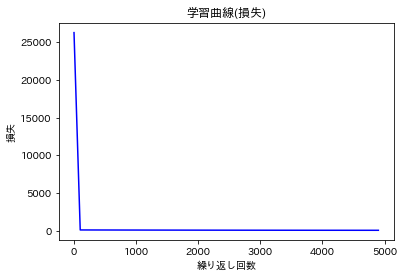

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

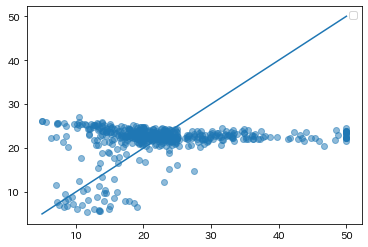

In [ ]:
plt.scatter(yt.flatten(), net.forward(torch.tensor(x).float()).data.flatten(), alpha=0.5)
plt.plot([min(yt), max(yt)], [min(yt), max(yt)])
plt.legend()